# Netflix Content Analysis

## Project Overview

This project analyzes the Netflix catalog to answer:

* How many Movies vs TV Shows?
* Which countries contribute most?
* What genres are dominant?
* What years saw content growth?
* Which ratings are most common?

This helps understand Netflix’s content strategy and global content distribution.

## Dataset Information

Use: `netflix_titles.csv`
 (Usually from Kaggle)

### Columns include:

* `type` (Movie / TV Show)
* `title`
* `country`
* `director`
* `cast`
* `date_added`
* `release_year`
* `rating`
* `duration`
* `listed_in` (genres/categories)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(rc={"figure.figsize": (10, 6)})

## Load Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset - Project/netflix_titles.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning

### Convert date

In [4]:
# Clean date strings first
df["date_added"] = df["date_added"].astype(str).str.strip()

# Convert to datetime safely
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Create date features
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month


### Handle missing values

In [5]:
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Not Rated")
df["duration"] = df["duration"].fillna("Unknown")

## Exploratory Data Analysis (EDA)

### Movies vs TV Shows

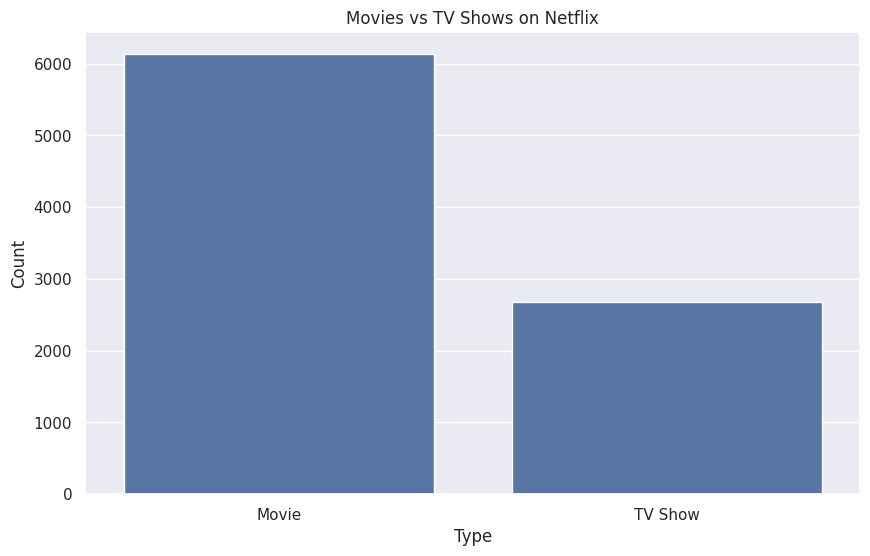

In [6]:
sns.countplot(x="type", data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

**Insight:**

* More Movies than TV Shows? or vice versa?

### Content added per year

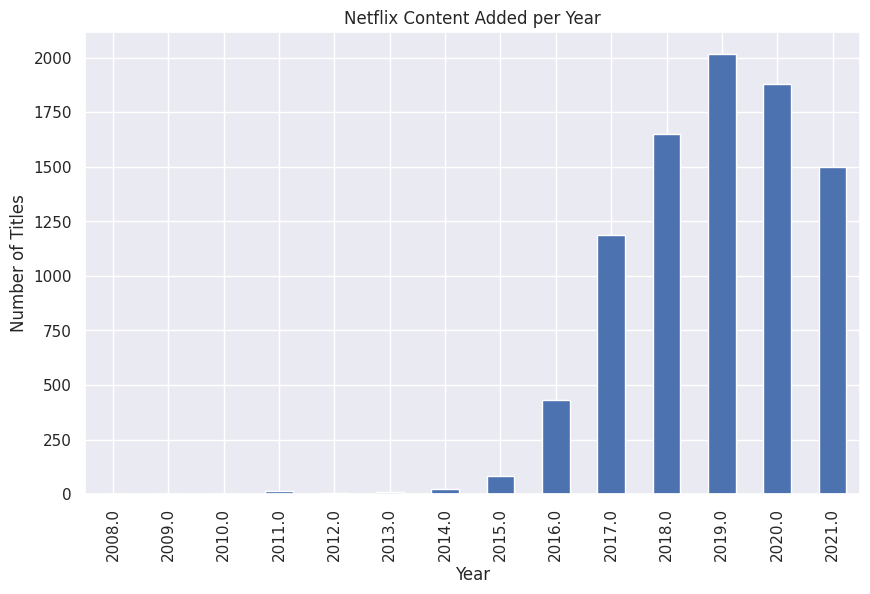

In [7]:
titles_per_year = df.groupby("year_added")["show_id"].count()

titles_per_year.plot(kind="bar")
plt.title("Netflix Content Added per Year")
plt.ylabel("Number of Titles")
plt.xlabel("Year")
plt.show()

**Insight:**

* This shows platform growth over time.

### Top countries producing Netflix content

Since some rows contain multiple countries (“United States, Canada”), we split them.

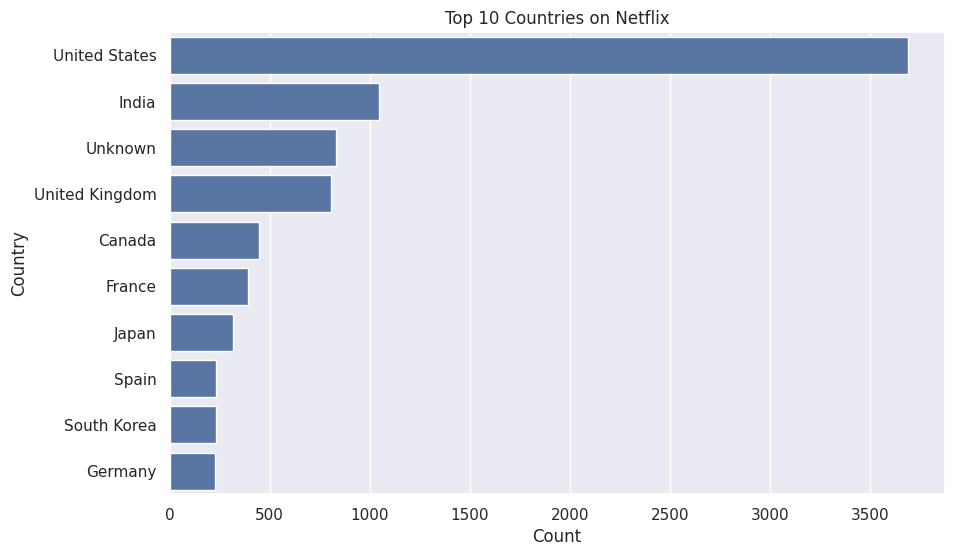

In [8]:
countries = df["country"].dropna().str.split(",", expand=True).stack().str.strip()

country_counts = countries.value_counts().head(10)

sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


**Insight:**

* US is usually #1, followed by India.

### Top genres

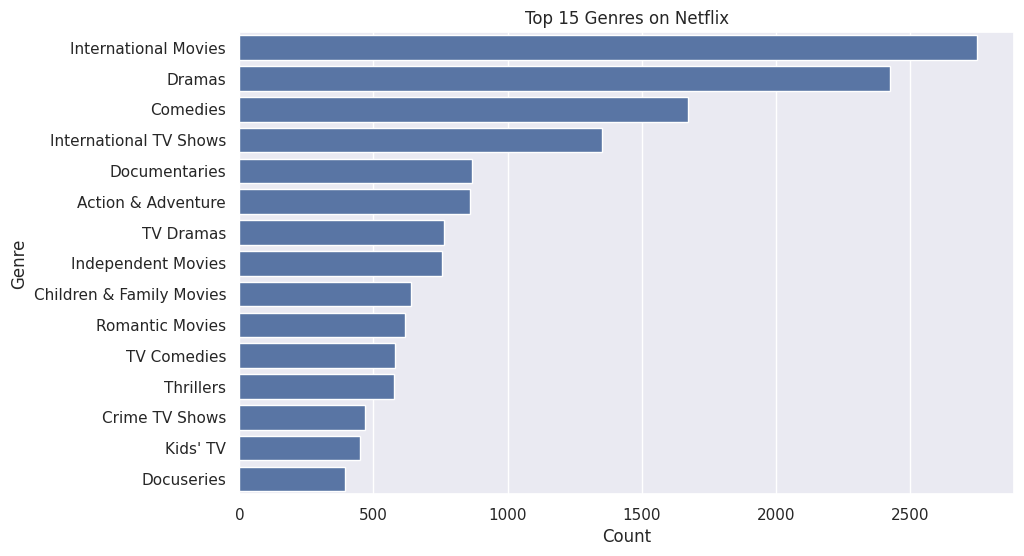

In [9]:
genres = df["listed_in"].dropna().str.split(",", expand=True).stack().str.strip()
genre_counts = genres.value_counts().head(15)

sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Insight:**

* Drama? Comedy? Documentaries?

### Ratings distribution

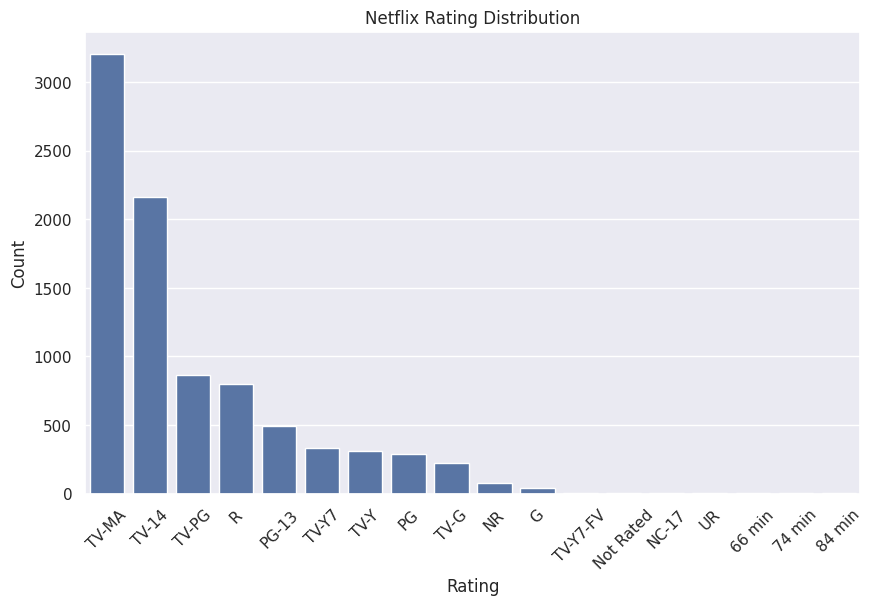

In [10]:
rating_counts = df["rating"].value_counts()

sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title("Netflix Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**Insight:**

* TV-MA or TV-14 tends to dominate.

### Average content duration

Split Movie & TV Show formats:

In [14]:
# Separate Movie & TV Show
df_movie = df[df["type"] == "Movie"].copy()
df_tv = df[df["type"] == "TV Show"].copy()

# Clean duration — handle Unknown & missing
df_movie["duration"] = df_movie["duration"].astype(str).str.strip()
df_movie["duration"] = df_movie["duration"].replace("Unknown", np.nan)

# Extract numeric minutes
df_movie["duration_minutes"] = df_movie["duration"].str.extract('(\d+)')
df_movie["duration_minutes"] = pd.to_numeric(df_movie["duration_minutes"], errors="coerce")

# View statistics
df_movie["duration_minutes"].describe()


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1530948038.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_movie["duration_minutes"] = df_movie["duration"].str.extract('(\d+)')


,duration_minutes
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


## ML Classification

Predict whether an entry is Movie or TV Show from features.

In [12]:
df_ml = df[["type", "release_year", "rating", "country"]].dropna().copy()

for col in ["type", "rating", "country"]:
    df_ml[col] = df_ml[col].astype("category").cat.codes

X = df_ml[["release_year", "rating", "country"]]
y = df_ml["type"]

Train:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7446083995459705

## Final Insights & Interpretation

Write conclusions like:

✔ Netflix has more movies than TV shows
✔ US is largest content source
✔ Drama & Comedy are most common genres
✔ After year XXXX, Netflix saw content explosion
✔ Rating TV-MA dominates library
✔ Average movie duration ~100 minutes

## Conclusion

This analysis provides insights into Netflix content distribution, growth, and user-targeted programming strategy. The findings help understand how Netflix evolves and adapts for global markets.